# Install Libraries

In [ ]:
# Required libraries
# %pip install --upgrade augly -q
# %pip install nlpaug -q
# %pip install python-magic-bin -q

# %pip install -q transformers
# %pip install -q torch torchvision

# Task 1: Data Augmentation


## Creating Train-Test Split

In [19]:
import os
import shutil
from glob import glob
from sklearn.model_selection import train_test_split

# Define data path and output path
data_path = os.path.join(os.getcwd(), "Cats and Dogs image classification")  # Get current working directory
output_path = "train-test"
os.makedirs(output_path, exist_ok=True)
os.makedirs(os.path.join(output_path, "train",), exist_ok=True)
os.makedirs(os.path.join(output_path, "test"), exist_ok=True)
os.makedirs(os.path.join(output_path, "train", "dogs"), exist_ok=True)
os.makedirs(os.path.join(output_path, "test", "dogs"), exist_ok=True)
os.makedirs(os.path.join(output_path, "train", "cats"), exist_ok=True)
os.makedirs(os.path.join(output_path, "test", "cats"), exist_ok=True)


# Adjust glob to search inside cats and dogs subdirectories
dog_images = glob(os.path.join(data_path, "dogs", "*.jpg"))
cat_images = glob(os.path.join(data_path, "cats", "*.jpg"))


# Verify the images found
print("Total Dog Images:", len(dog_images))
print("Total Cat Images:", len(cat_images))


# Split dogs and  separately
randomState = 42
train_dogs, test_dogs = train_test_split(dog_images, test_size=0.2, random_state=randomState)
train_cats, test_cats = train_test_split(cat_images, test_size=0.2, random_state=randomState)


# Function to copy images to train/test folders
def copy_images(image_list, destination_folder):
    for img in image_list:
        shutil.copy(img, os.path.join(destination_folder, os.path.basename(img)))

# Copy all images into `train/` and `test/`
copy_images(train_dogs , os.path.join(output_path, "train", "dogs"))
copy_images(train_cats, os.path.join(output_path, "train", "cats"))
copy_images(test_dogs , os.path.join(output_path, "test", "dogs"))
copy_images(test_cats, os.path.join(output_path, "test", "cats"))

# Display final statistics
print(f"Train Set: {len(train_dogs) + len(train_cats)} images")
print(f"Test Set: {len(test_dogs) + len(test_cats)} images")
print("Images copied to train-test directory.")


Total Dog Images: 70
Total Cat Images: 70
Train Set: 112 images
Test Set: 28 images
Images copied to train-test directory.


## Augmenting Immages

In [8]:
import augly.image as imaugs
print("Fnctions AugLy.image has are: \n", dir(imaugs))


Fnctions AugLy.image has are: 
 ['ApplyLambda', 'ApplyPILFilter', 'Blur', 'Brightness', 'ChangeAspectRatio', 'ClipImageSize', 'ColorJitter', 'Compose', 'Contrast', 'ConvertColor', 'Crop', 'EncodingQuality', 'Grayscale', 'HFlip', 'MaskedComposite', 'MemeFormat', 'OneOf', 'Opacity', 'OverlayEmoji', 'OverlayImage', 'OverlayOntoBackgroundImage', 'OverlayOntoScreenshot', 'OverlayStripes', 'OverlayText', 'Pad', 'PadSquare', 'PerspectiveTransform', 'Pixelization', 'RandomAspectRatio', 'RandomBlur', 'RandomBrightness', 'RandomEmojiOverlay', 'RandomNoise', 'RandomPixelization', 'RandomRotation', 'Resize', 'Rotate', 'Saturation', 'Scale', 'Sharpen', 'ShufflePixels', 'Skew', 'VFlip', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'apply_lambda', 'apply_lambda_intensity', 'apply_pil_filter', 'apply_pil_filter_intensity', 'aug_np_wrapper', 'blur', 'blur_intensity', 'brightness', 'brightness_intensity', 'change_aspect_

In [ ]:
import os
import random
from glob import glob
from PIL import Image
import augly.image as imaugs
from tqdm import tqdm
import shutil

# Create the train-test_aug directory if it doesn't exist
base_dir = os.path.join(os.getcwd(), "train-test")
train_aug_dir = os.path.join(base_dir, "train_aug")
os.makedirs(train_aug_dir, exist_ok=True)
os.makedirs(os.path.join(train_aug_dir, "dogs",), exist_ok=True)
os.makedirs(os.path.join(train_aug_dir, "cats",), exist_ok=True)


# Get all training images
train_images = glob(os.path.join(os.getcwd(), "train-test", "train", "**/*.jpg"))
print(f"Total original training images: {len(train_images)}")


# AugLy augmentations
augmentations = [
    imaugs.RandomAspectRatio(),
    imaugs.RandomBrightness(),
    imaugs.RandomBlur(),
    imaugs.RandomNoise(),
    imaugs.Rotate(degrees=random.randint(15, 45)),
    imaugs.Crop(),
    imaugs.HFlip(),
    imaugs.VFlip(),
    imaugs.Saturation(),
    imaugs.Opacity()
]

# Augmentation Function
def apply_augmentations(image_path):
    image = Image.open(image_path).convert("RGB")
    
    augmented_images = []
    # Create 2 augmented versions per image
    aug1, aug2, aug3, aug4, aug5, aug6 = random.sample(augmentations, 6)  # Pick 3 different augmentations
    aug_image1 = aug3(aug2(aug1(image)))  # Apply transformations sequentially
    augmented_images.append(aug_image1)
    aug_image2 = aug6(aug5(aug4(image)))  # Apply transformations sequentially
    augmented_images.append(aug_image2)

    return augmented_images

# Perform Augmentation on Train Set and Save Both Original and Augmented Images
for img_path in tqdm(train_images, desc="Augmenting Images"):
    # Copy original image to train-test_aug/train
    original_img_name = os.path.basename(img_path)

    # Determine if it's a 'dog' or 'cat' based on the image name
    if 'dog' in original_img_name.lower():
        category = 'dogs'
    elif 'cat' in original_img_name.lower():
        category = 'cats'

    original_img_path = os.path.join(os.path.join(train_aug_dir, category), original_img_name)
    
    shutil.copy(img_path, original_img_path)  # Copy original image to augmented directory
    
    # Apply augmentations and save the augmented images
    aug_images = apply_augmentations(img_path)
    for i, aug_img in enumerate(aug_images):
        aug_img_name = f"{original_img_name.replace('.jpg', '')}_aug{i}.jpg"  # Name for augmented image

        # Determine if it's a 'dog' or 'cat' based on the image name
        if 'dog' in original_img_name.lower():
            category = 'dogs'
        elif 'cat' in original_img_name.lower():
            category = 'cats'

        category_dir = os.path.join(train_aug_dir, category)
        aug_img_path = os.path.join(category_dir, aug_img_name)
        aug_img.save(aug_img_path)

# Show Dataset Statistics (including augmented images)
augmented_train_count = len(glob(os.path.join(train_aug_dir, "**/*.jpg")))

print(f"Total augmented training set images (original + augmented): {augmented_train_count}")


Total original training images: 112


Augmenting Images: 100%|██████████| 112/112 [00:20<00:00,  5.35it/s]

Total augmented training set images (original + augmented): 336


## Ploting bar graphs

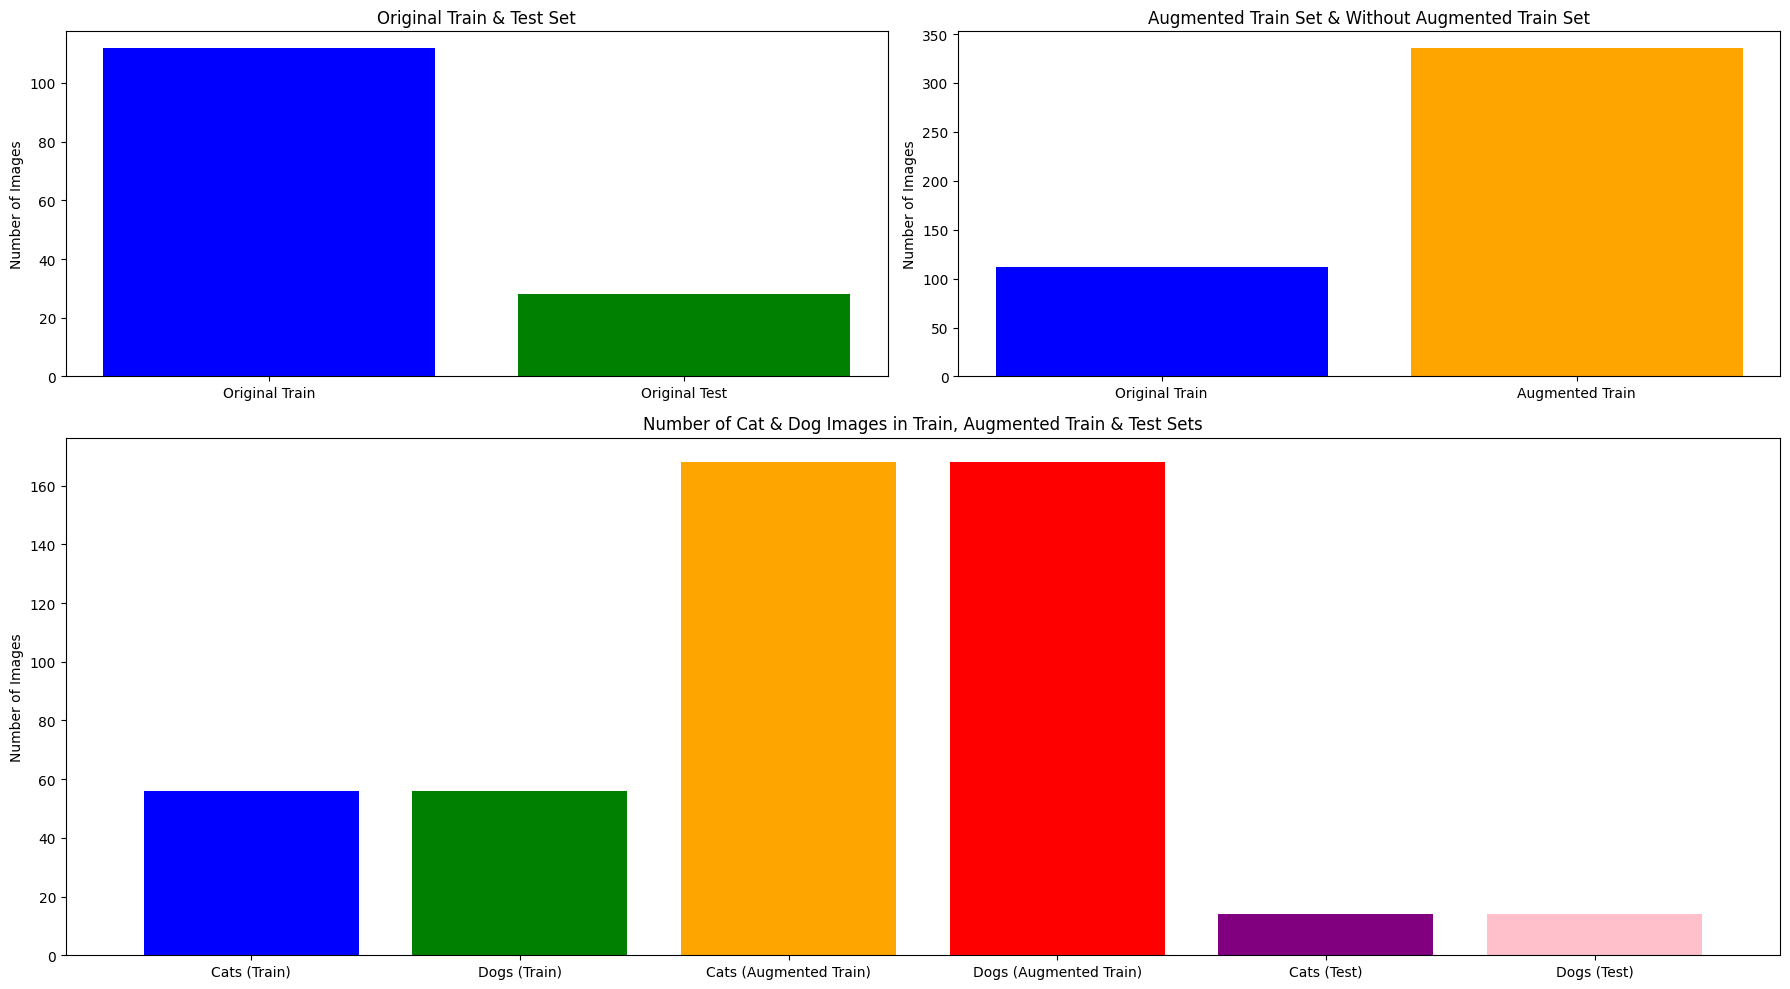

Original Train Set: 112 images
Original Test Set: 28 images

Original Train Set: 112 images
Augmented Train Set: 336 images

Original Train cats set: 56 images
Original Test degs set: 56 images
Original Augmented Test Set: 168 images
Original Augmented Test cats set: 168 images
Original Test cats Set: 14 images
Original Test dogs Set: 14 images


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from glob import glob
import os

# Define directories
train_dir = os.path.join(os.getcwd(), "train-test", "train")
train_aug_dir = os.path.join(os.getcwd(), "train-test", "train_aug")
test_dir = os.path.join(os.getcwd(), "train-test", "test")

# Get the number of images in the original train and test sets
original_train_images = len(glob(os.path.join(train_dir, "**/*.jpg")))
original_test_images = len(glob(os.path.join(test_dir, "**/*.jpg")))

# Create a 2x2 grid with a centered bottom plot
fig = plt.figure(figsize=(18, 10))
gs = GridSpec(2, 2, height_ratios=[1, 1.5])  # Make row 2 larger


# Plot 1: Original Train & Test Set Image Counts
ax1 = fig.add_subplot(gs[0, 0])
ax1.bar(['Original Train', 'Original Test'], [original_train_images, original_test_images], color=['blue', 'green'])
ax1.set_title("Original Train & Test Set")
ax1.set_ylabel("Number of Images")

# Get the number of images in the augmented train set
augmented_train_images = len(glob(os.path.join(train_aug_dir, "**/*jpg")))



# Plot 2: Augmented Train Set & Without Augmented Train Set
ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(['Original Train', 'Augmented Train'], [original_train_images, augmented_train_images], color=['blue', 'orange'])
ax2.set_title("Augmented Train Set & Without Augmented Train Set")
ax2.set_ylabel("Number of Images")

# Function to count cat and dog images in a directory
def count_cat_dog_images(directory):
    cats = len([img for root, dirs, files in os.walk(directory) for img in files if "cat" in img.lower() and img.endswith(".jpg")])
    dogs = len([img for root, dirs, files in os.walk(directory) for img in files if "dog" in img.lower() and img.endswith(".jpg")])
    return cats, dogs

# Count cat and dog images in original train set, augmented train set, and test set
train_cats, train_dogs = count_cat_dog_images(train_dir)
train_aug_cats, train_aug_dogs = count_cat_dog_images(train_aug_dir)
test_cats, test_dogs = count_cat_dog_images(test_dir)


# Plot 3: Number of Cat & Dog Images in Train, Augmented Train & Test Sets (Centered)
ax3 = fig.add_subplot(gs[1, :])  # Span across both columns
ax3.bar(['Cats (Train)', 'Dogs (Train)', 'Cats (Augmented Train)', 'Dogs (Augmented Train)', 'Cats (Test)', 'Dogs (Test)'],
        [train_cats, train_dogs, train_aug_cats, train_aug_dogs, test_cats, test_dogs],
        color=['blue', 'green', 'orange', 'red', 'purple', 'pink'])
ax3.set_title("Number of Cat & Dog Images in Train, Augmented Train & Test Sets")
ax3.set_ylabel("Number of Images")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Print the counts
print(f"Original Train Set: {original_train_images} images")
print(f"Original Test Set: {original_test_images} images\n")

print(f"Original Train Set: {original_train_images} images")
print(f"Augmented Train Set: {augmented_train_images} images\n")

print(f"Original Train cats set: {train_cats} images")
print(f"Original Test degs set: { train_dogs} images")
print(f"Original Augmented Test Set: {train_aug_dogs} images")
print(f"Original Augmented Test cats set: {train_aug_cats} images")
print(f"Original Test cats Set: {test_cats} images")
print(f"Original Test dogs Set: {test_dogs} images")


# Task 2: Model Training

## Initialize its new weights

In [6]:
import torch
from transformers import ResNetForImageClassification

# Function to initialize model with a fixed seed
def initialize_model(seed=42):
    torch.manual_seed(seed)  # Set seed for reproducibility
    model = ResNetForImageClassification.from_pretrained("microsoft/resnet-50")
    model.init_weights()  # Reinitialize weights
    return model

# Initialize twice with the same seed 
rseed = 42
model1 = initialize_model(seed=rseed)
model2 = initialize_model(seed=rseed)

model2.load_state_dict(model1.state_dict())  # Weight copy

# Verify weight equality
def check_weight_equality(model_a, model_b):
    for (name_a, param_a), (name_b, param_b) in zip(model_a.named_parameters(), model_b.named_parameters()):
        if not torch.allclose(param_a, param_b, atol=1e-8):
            print(f"Weight mismatch in {name_a}!")
            return False
    print("All weights are identical!")
    return True

check_weight_equality(model1, model2)

All weights are identical!


True

## Training model on the dataset with and without augmentation.

### Defininng model

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Define device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformations for train and test
train_transforms_no_aug = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_transforms_aug = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load dataset (No Augmentation)
train_dataset_no_aug = datasets.ImageFolder(root="train-test/train", transform=train_transforms_no_aug)
train_loader_no_aug = DataLoader(train_dataset_no_aug, batch_size=32, shuffle=True)

# Load dataset (With Augmentation)
train_dataset_aug = datasets.ImageFolder(root="train-test/train", transform=train_transforms_aug)
train_loader_aug = DataLoader(train_dataset_aug, batch_size=32, shuffle=True)

# Load test dataset
test_dataset = datasets.ImageFolder(root="train-test/test", transform=test_transforms)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define Training Function
def train_model(model, train_loader, epochs=5, lr=0.001):
    model.to(device)
    model.train()
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images).logits  
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")

    return model

# Define Evaluation Function
def evaluate_model(model, test_loader):
    model.to(device)
    model.eval()
    
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).logits  
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds)

    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')

    return acc, precision, recall, f1


### Training Both models

In [ ]:
# Train model1 (Without Augmentation)
print("Training model WITHOUT augmentation...")
model1 = train_model(model1, train_loader_no_aug)

# Train model2 (With Augmentation)
print("\nTraining model WITH augmentation...")
model2 = train_model(model2, train_loader_aug)

# Evaluate both models
print("\nEvaluating model WITHOUT augmentation...")
acc1, precision1, recall1, f1_1 = evaluate_model(model1, test_loader)
print(f"Model Without Augmentation - \nAccuracy: {acc1:.4f}, \nPrecision: {precision1:.4f}, \nRecall: {recall1:.4f}, \nF1-score: {f1_1:.4f}")

print("\nEvaluating model WITH augmentation...")
acc2, precision2, recall2, f1_2 = evaluate_model(model2, test_loader)
print(f"Model With Augmentation - \nAccuracy: {acc2:.4f}, \nPrecision: {precision2:.4f}, \nRecall: {recall2:.4f}, \nF1-score: {f1_2:.4f}")


Training model WITHOUT augmentation...
Epoch 1/5, Loss: 31.3358
Epoch 2/5, Loss: 15.1948
Epoch 3/5, Loss: 4.9342
Epoch 4/5, Loss: 1.4691
Epoch 5/5, Loss: 0.3938

Training model WITH augmentation...
Epoch 1/5, Loss: 34.3220
Epoch 2/5, Loss: 16.6207
Epoch 3/5, Loss: 6.0865
Epoch 4/5, Loss: 1.8641
Epoch 5/5, Loss: 0.4411

Evaluating model WITHOUT augmentation...

Model Without Augmentation - Accuracy: 0.9286, Precision: 0.9286, Recall: 0.9286, F1-score: 0.9286

Evaluating model WITH augmentation...

Model With Augmentation - Accuracy: 0.8571, Precision: 0.8889, Recall: 0.8571, F1-score: 0.8542


### No. of parameter

In [12]:
def count_parameters(model):
    # Count the total number of parameters in the model
    total_params = sum(p.numel() for p in model.parameters())
    return total_params

# Example: Count parameters for a ResNet-50 model
model = ResNetForImageClassification.from_pretrained("microsoft/resnet-50")
total_params = count_parameters(model)

print(f"Total Number of Parameters: {total_params}")


Total Number of Parameters: 25557032


### Archtecture of resnet-50

![alt text](microsoft/resnet-50_Architecture.jpg)

In [ ]:
import torch.optim as optim

# Model
model = ResNetForImageClassification.from_pretrained("microsoft/resnet-50")

# Optimizer (Example: Adam)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Loss Function (Example: CrossEntropy)
loss_fn = torch.nn.CrossEntropyLoss()

# Learning Rate Scheduler (Example: StepLR)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

# Training parameters
epochs = 5
batch_size = 32

# Print training parameters
print("Model Architecture:", model)
print("Optimizer:", optimizer)
for param_group in optimizer.param_groups:
    print("Learning Rate:", param_group['lr'])
print("Loss Function:", loss_fn)
print("Epochs:", epochs)
print("Batch Size:", batch_size)
print("Learning Rate Scheduler:", scheduler)


Model Architecture: ResNetForImageClassification(
  (resnet): ResNetModel(
    (embedder): ResNetEmbeddings(
      (embedder): ResNetConvLayer(
        (convolution): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): ReLU()
      )
      (pooler): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    )
    (encoder): ResNetEncoder(
      (stages): ModuleList(
        (0): ResNetStage(
          (layers): Sequential(
            (0): ResNetBottleNeckLayer(
              (shortcut): ResNetShortCut(
                (convolution): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (con

### Result Analysis


Model Without Augmentation: The model without augmentation achieved excellent results, with high accuracy and balanced precision, recall, and F1-score. This suggests the model is correctly identifying both classes with high efficiency.

Model With Augmentation: The model with augmentation performed slightly worse in terms of accuracy but had a similar precision and recall. This suggests that while augmentations may have introduced more variety in the data, the model found it harder to generalize as effectively. The trade-off between a slight decrease in accuracy and potentially better generalization could be addressed by tuning augmentation parameters or training for more epochs.